# Assignment 1

## Exercise 8

### Part (a)

Use the read.csv() function to read the data into R. Call the
loaded data college. Make sure that you have the directory set
to the correct location for the data.

In [1]:
college = read.csv("College.csv")

### Part (b)

Look at the data using the fix() function.

In [2]:
fix(college)

You should notice
that the first column is just the name of each university. We don’t
really want R to treat this as data. However, it may be handy to
have these names for later. Try the following commands:

In [3]:
rownames(college) = college[,1]
fix(college)

You should see that there is now a row.names column with the
name of each university recorded. This means that R has given
each row a name corresponding to the appropriate university. R
will not try to perform calculations on the row names. However,
we still need to eliminate the first column in the data where the
names are stored. Try

In [4]:
college = college[,-1]
fix(college)

Now you should see that the first data column is Private. Note
that another column labeled row.names now appears before the
Private column. However, this is not a data column but rather
the name that R is giving to each row.

### Part (c)

 Use the summary() function to produce a numerical summary
of the variables in the data set.

In [5]:
summary(college)

   Private               Apps           Accept          Enroll    
 Length:777         Min.   :   81   Min.   :   72   Min.   :  35  
 Class :character   1st Qu.:  776   1st Qu.:  604   1st Qu.: 242  
 Mode  :character   Median : 1558   Median : 1110   Median : 434  
                    Mean   : 3002   Mean   : 2019   Mean   : 780  
                    3rd Qu.: 3624   3rd Qu.: 2424   3rd Qu.: 902  
                    Max.   :48094   Max.   :26330   Max.   :6392  
   Top10perc       Top25perc      F.Undergrad     P.Undergrad     
 Min.   : 1.00   Min.   :  9.0   Min.   :  139   Min.   :    1.0  
 1st Qu.:15.00   1st Qu.: 41.0   1st Qu.:  992   1st Qu.:   95.0  
 Median :23.00   Median : 54.0   Median : 1707   Median :  353.0  
 Mean   :27.56   Mean   : 55.8   Mean   : 3700   Mean   :  855.3  
 3rd Qu.:35.00   3rd Qu.: 69.0   3rd Qu.: 4005   3rd Qu.:  967.0  
 Max.   :96.00   Max.   :100.0   Max.   :31643   Max.   :21836.0  
    Outstate       Room.Board       Books           Personal  

Use the pairs() function to produce a scatterplot matrix of
the first ten columns or variables of the data. Recall that
you can reference the first ten columns of a matrix A using
A[,1:10].

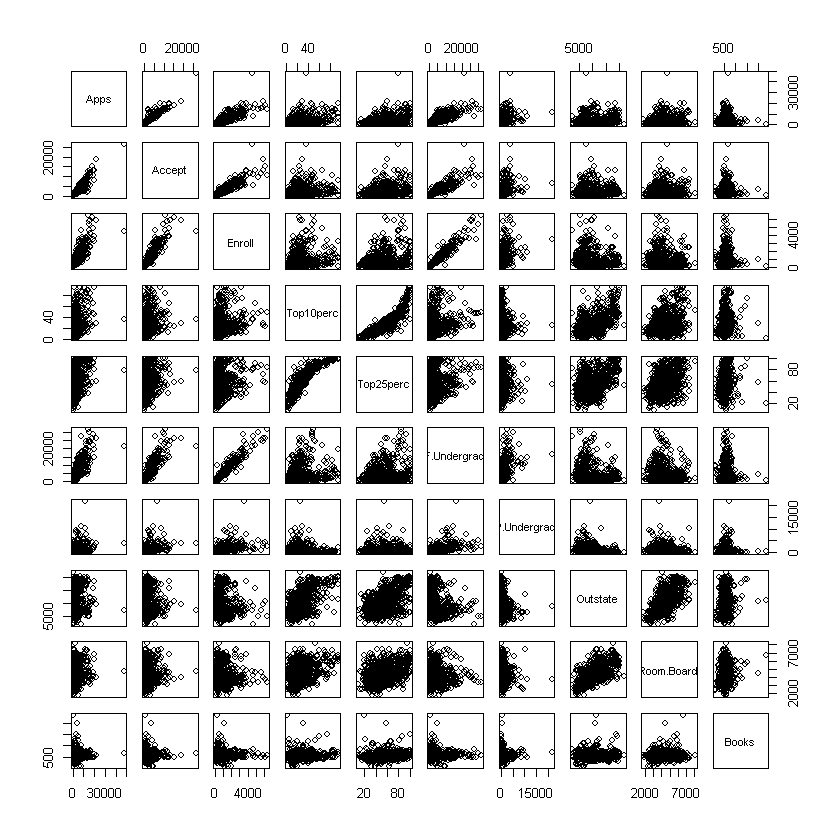

In [6]:
pairs(college[2:11]) # skip "Private" since it is not a quantitative variable

Use the plot() function to produce side-by-side boxplots of
Outstate versus Private.

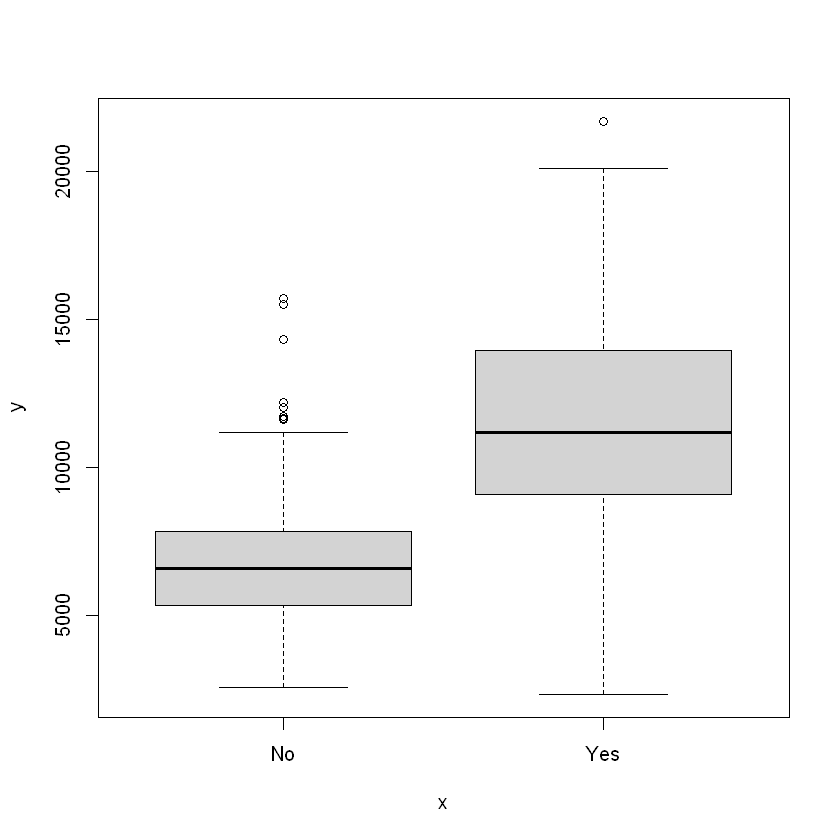

In [7]:
attach(college)
Private = as.factor(Private)

plot(Private, Outstate)

Create a new qualitative variable, called Elite, by binning
the Top10perc variable. We are going to divide universities
into two groups based on whether or not the proportion
of students coming from the top 10% of their high school
classes exceeds 50%.

In [8]:
Elite = rep("No", nrow(college))
Elite[Top10perc>50]="Yes"
Elite = as.factor(Elite)
college=data.frame(college,Elite)

Use the summary() function to see how many elite universities there are. Now use the plot() function to produce
side-by-side boxplots of Outstate versus Elite.

No Yes 
699  78

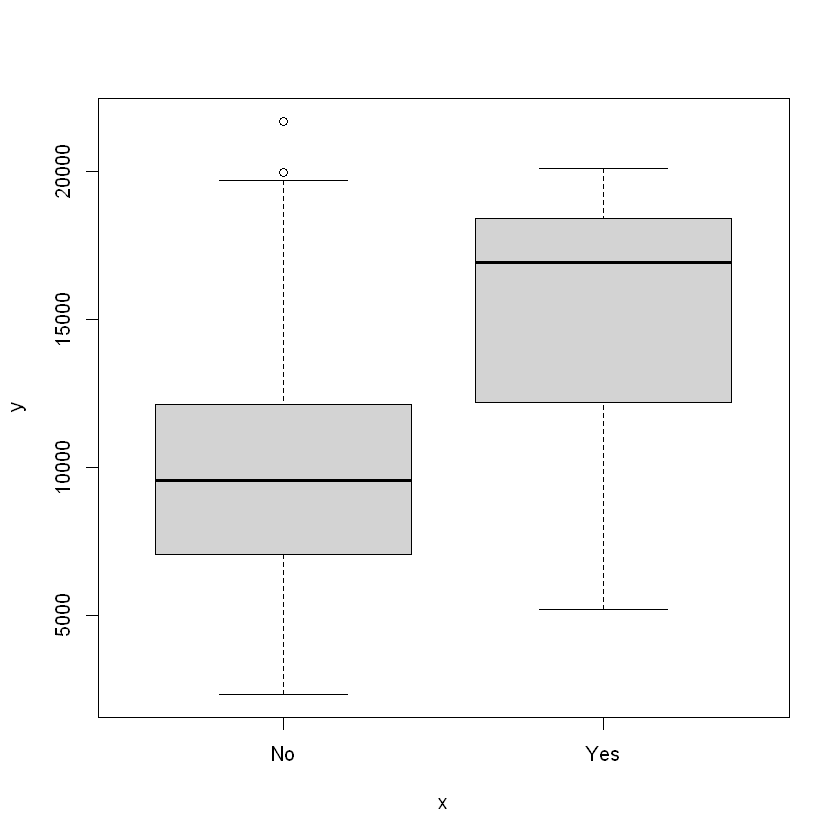

In [9]:
summary(Elite)
plot(Elite,Outstate)

Use the hist() function to produce some histograms with
differing numbers of bins for a few of the quantitative variables. You may find the command par(mfrow=c(2,2)) useful:
it will divide the print window into four regions so that four
plots can be made simultaneously. Modifying the arguments
to this function will divide the screen in other ways.

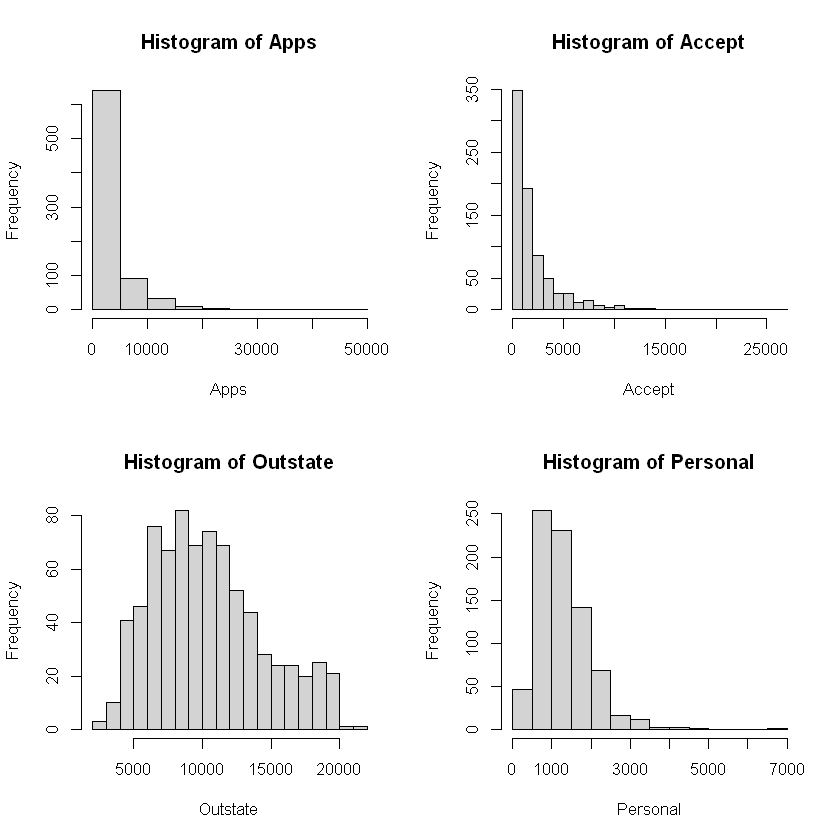

In [10]:
par(mfrow=c(2,2))
hist(Apps, breaks=15)
hist(Accept, breaks=25)
hist(Outstate, breaks=20)
hist(Personal, breaks=10)

Continue exploring the data, and provide a brief summary
of what you discover.

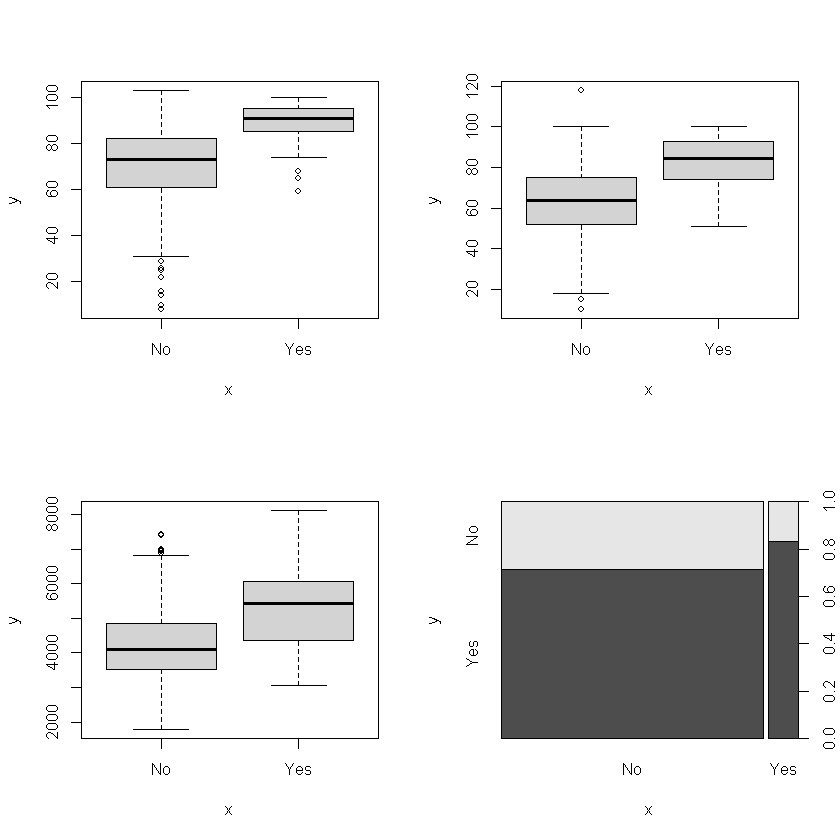

In [11]:
par(mfrow=c(2,2))
plot(Elite, PhD)
plot(Elite, Grad.Rate)
plot(Elite, Room.Board)
plot(Elite, Private)

As we can see, the elite universities in this data set have more PhD students, more students graduating, more expensive Room/Board, and are more likely to be private than non-elite schools.

## Exercise 9

This exercise involves the Auto data set studied in the lab. Make sure
that the missing values have been removed from the data

In [12]:
auto = read.csv("Auto.csv", header=T, na.strings="?")
auto = na.omit(auto)

attach(auto)

fix(auto)



### Part(a)

Which of the predictors are quantitative, and which are qualitative?

In [13]:
summary(auto)
lapply(auto, class) # lapply basically applies a function to every element in a list/datafram and outputs a list

      mpg          cylinders      displacement     horsepower        weight    
 Min.   : 9.00   Min.   :3.000   Min.   : 68.0   Min.   : 46.0   Min.   :1613  
 1st Qu.:17.00   1st Qu.:4.000   1st Qu.:105.0   1st Qu.: 75.0   1st Qu.:2225  
 Median :22.75   Median :4.000   Median :151.0   Median : 93.5   Median :2804  
 Mean   :23.45   Mean   :5.472   Mean   :194.4   Mean   :104.5   Mean   :2978  
 3rd Qu.:29.00   3rd Qu.:8.000   3rd Qu.:275.8   3rd Qu.:126.0   3rd Qu.:3615  
 Max.   :46.60   Max.   :8.000   Max.   :455.0   Max.   :230.0   Max.   :5140  
  acceleration        year           origin          name          
 Min.   : 8.00   Min.   :70.00   Min.   :1.000   Length:392        
 1st Qu.:13.78   1st Qu.:73.00   1st Qu.:1.000   Class :character  
 Median :15.50   Median :76.00   Median :1.000   Mode  :character  
 Mean   :15.54   Mean   :75.98   Mean   :1.577                     
 3rd Qu.:17.02   3rd Qu.:79.00   3rd Qu.:2.000                     
 Max.   :24.80   Max.   :82.00  

$mpg
[1] "numeric"

$cylinders
[1] "numeric"

$displacement
[1] "numeric"

$horsepower
[1] "numeric"

$weight
[1] "numeric"

$acceleration
[1] "numeric"

$year
[1] "numeric"

$origin
[1] "numeric"

$name
[1] "character"

Quantitative:
* mpg
* cylinders
* displacement
* horsepower
* weight
* acceleration
* year

Qualitiative:
* name
* origin (Even though it is a numeric variable, I did some research and found out it actually represents where the car was made - and doesn't represent a quantity)

### Part (b)

What is the range of each quantitative predictor? You can answer this using the range() function.

In [14]:
qtv = auto[,1:7] # auto data frame with only quantitative columns
lapply(qtv, range)



$mpg
[1]  9.0 46.6

$cylinders
[1] 3 8

$displacement
[1]  68 455

$horsepower
[1]  46 230

$weight
[1] 1613 5140

$acceleration
[1]  8.0 24.8

$year
[1] 70 82

Ranges:
* mpg: 9 - 46.6
* cylinders: 3 - 8
* displacement: 68 - 455
* horsepower: 46 - 230
* weight: 1613 - 5140
* acceleration: 8 - 24.8
* year: 70 - 82

### Part (c)

What is the mean and standard deviation of each quantitative
predictor?

In [15]:
print("Mean")
lapply(qtv, mean)

[1] "Mean"


$mpg
[1] 23.44592

$cylinders
[1] 5.471939

$displacement
[1] 194.412

$horsepower
[1] 104.4694

$weight
[1] 2977.584

$acceleration
[1] 15.54133

$year
[1] 75.97959

In [16]:
print("Std. Dev.")
lapply(qtv, sd)

[1] "Std. Dev."


$mpg
[1] 7.805007

$cylinders
[1] 1.705783

$displacement
[1] 104.644

$horsepower
[1] 38.49116

$weight
[1] 849.4026

$acceleration
[1] 2.758864

$year
[1] 3.683737

Mean/Std. Dev

* mpg: 23.45/7.81
* cylinders: 5.46/1.71
* displacement: 194.41/104.64
* horsepower: 104.47/38.49
* weight: 2977.58/849.40
* acceleration: 15.54/2.76
* year: 75.98/3.68


### Part (d)

Now remove the 10th through 85th observations. What is the
range, mean, and standard deviation of each predictor in the
subset of the data that remains?

In [17]:
qtv1 = qtv[-85:-10,]
print("Range")
lapply(qtv1, range)

[1] "Range"


$mpg
[1] 11.0 46.6

$cylinders
[1] 3 8

$displacement
[1]  68 455

$horsepower
[1]  46 230

$weight
[1] 1649 4997

$acceleration
[1]  8.5 24.8

$year
[1] 70 82

In [18]:
print("Mean")
lapply(qtv1, mean)

[1] "Mean"


$mpg
[1] 24.40443

$cylinders
[1] 5.373418

$displacement
[1] 187.2405

$horsepower
[1] 100.7215

$weight
[1] 2935.972

$acceleration
[1] 15.7269

$year
[1] 77.14557

In [19]:
print("Std. Dev.")
lapply(qtv1, sd)

[1] "Std. Dev."


$mpg
[1] 7.867283

$cylinders
[1] 1.654179

$displacement
[1] 99.67837

$horsepower
[1] 35.70885

$weight
[1] 811.3002

$acceleration
[1] 2.693721

$year
[1] 3.106217

Ummmm: I'm not going to write all the values again, but i think you can see!

### Part (e)

 Using the full data set, investigate the predictors graphically,
using scatterplots or other tools of your choice. Create some plots
highlighting the relationships among the predictors. Comment
on your findings.

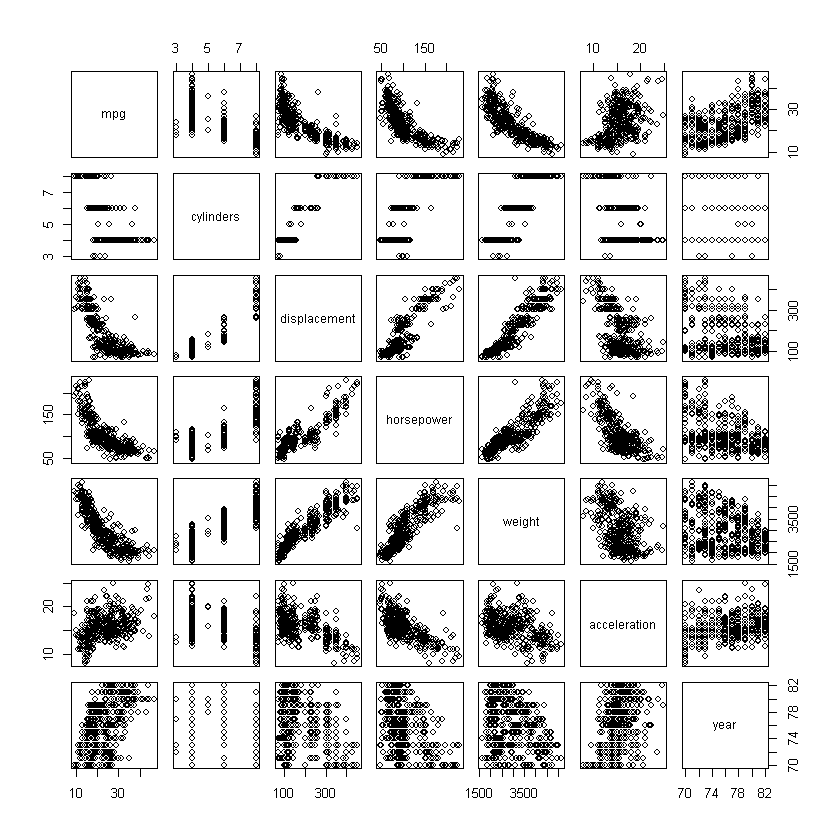

In [20]:
pairs(qtv)

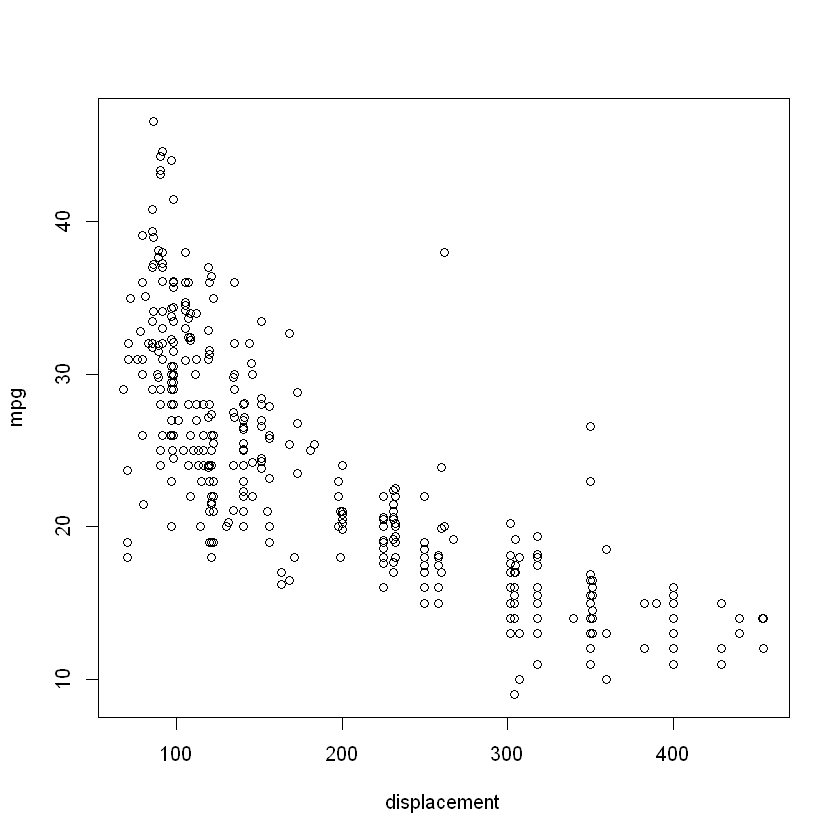

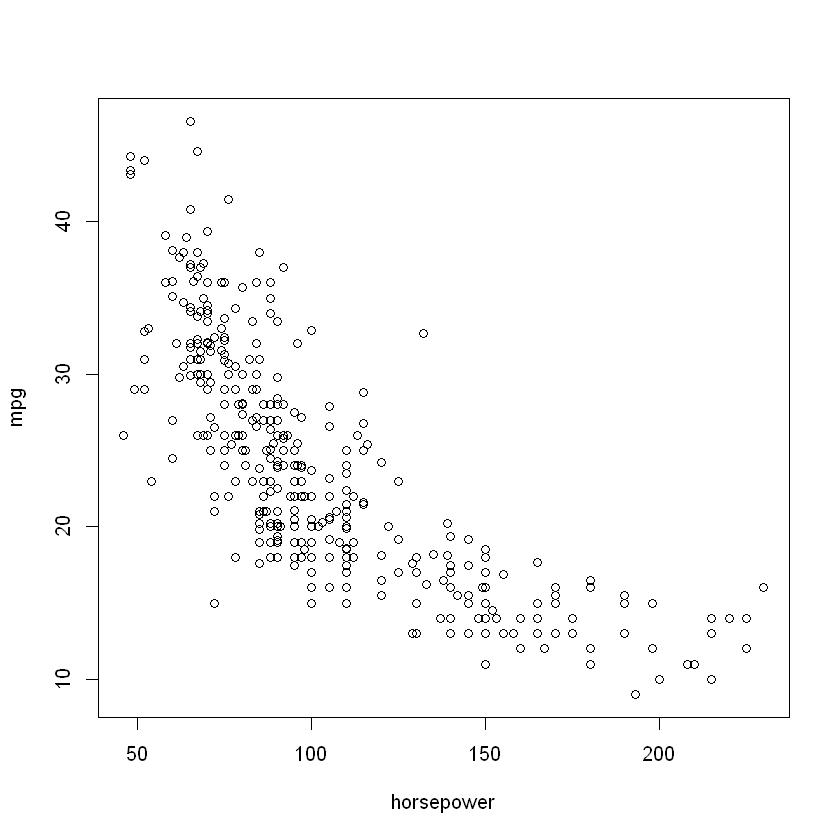

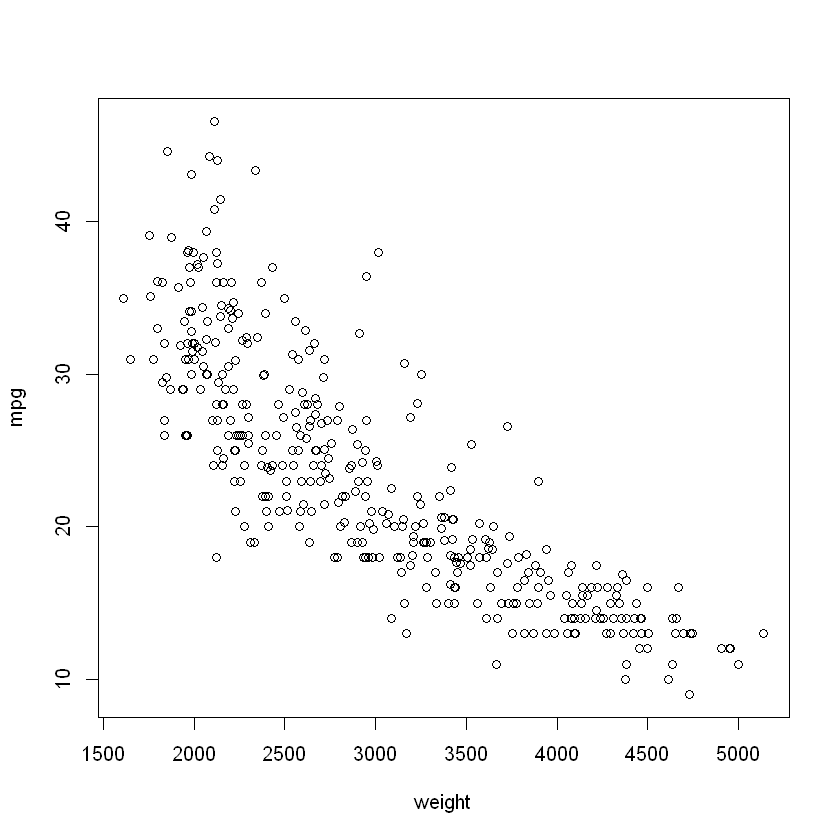

In [25]:
cylinders = as.factor(cylinders)
origin = as.factor(origin)

plot(displacement, mpg)
plot(horsepower, mpg)
plot(weight, mpg)


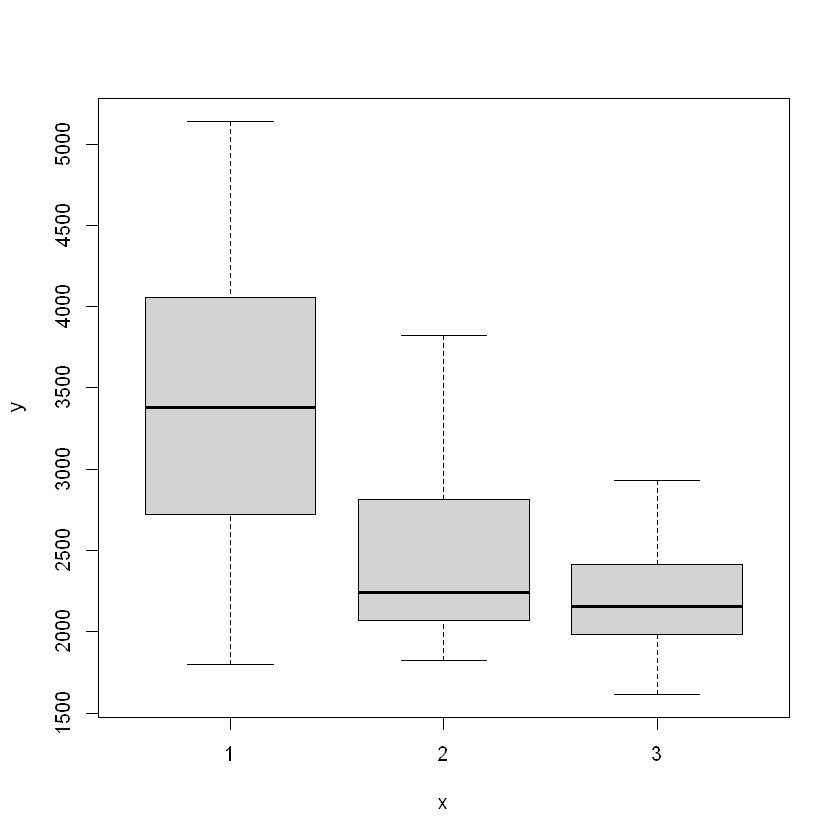

In [22]:
plot(origin, weight)

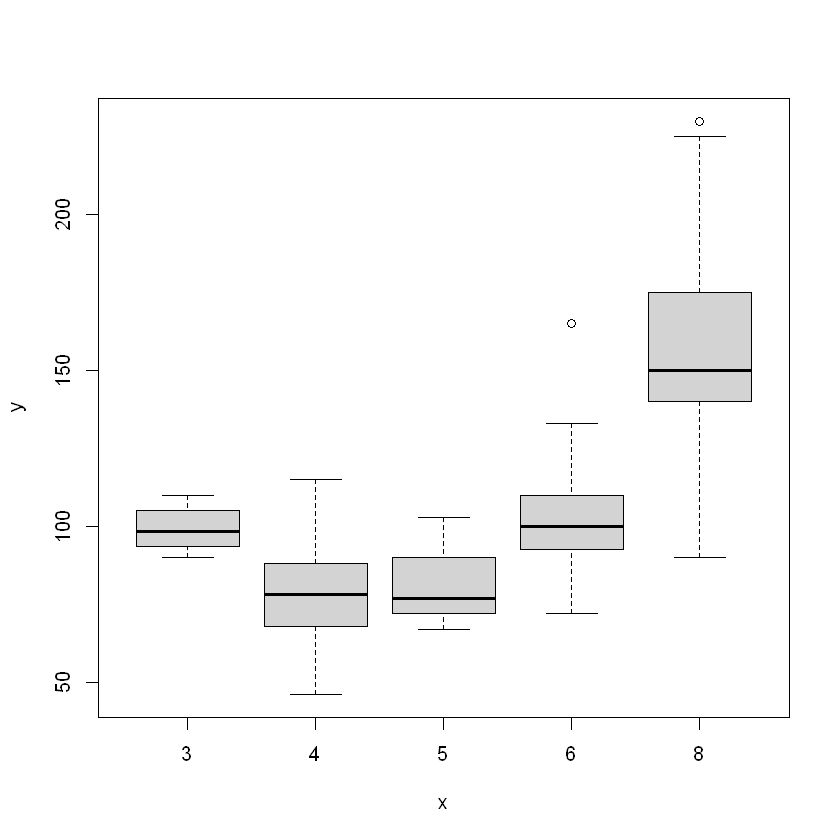

In [23]:
plot(cylinders, horsepower)

It seems that cars from the US (origin 1) are much heavier than cars made in Canda and Mexico (2 and 3)! Also it looks like increasing the number of cylinders in the engine doesn't correlate to a direct increase in horsepower - instead 3 cylinders actually performs better than 4 and 5, but eventually after adding enough cylinders sheer power wins out I guess.

### Part (f)

Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer.

Based on the pairs plot, I think weight, horsepower, and displacement seem to be good predictors of mpg. This is because the data points closely fit a curve (possible 1/x) so it looks like we can get close estimates with each predictor.

## Exercise 10

This exercise involves the Boston housing data set.

### Part (a)

To begin, load in the Boston data set. The Boston data set is
part of the MASS library in R.

In [82]:
library(MASS)

Now the data set is contained in the object Boston

In [ ]:
Boston # Output too large so not shown

Read about the data set:

In [ ]:
?Boston # Output too large so not shown

**How many rows are in this data set? How many columns? What
do the rows and columns represent?**

There are 506 rows and 14 columns.

Each row represents a suburb of Boston, and each column represents a specific attribute of the suburbs (crime rate, avg. number of rooms, etc.)

### Part (b)

Make some pairwise scatterplots of the predictors (columns) in
this data set. Describe your findings.

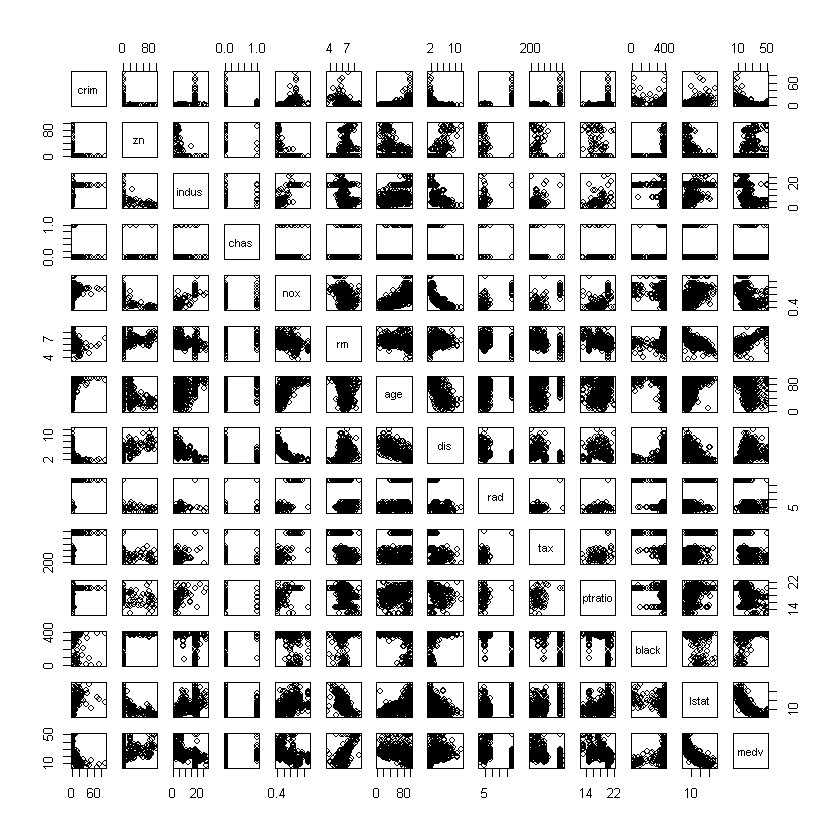

In [29]:
attach(Boston)

chas = as.factor(chas)

pairs(Boston)

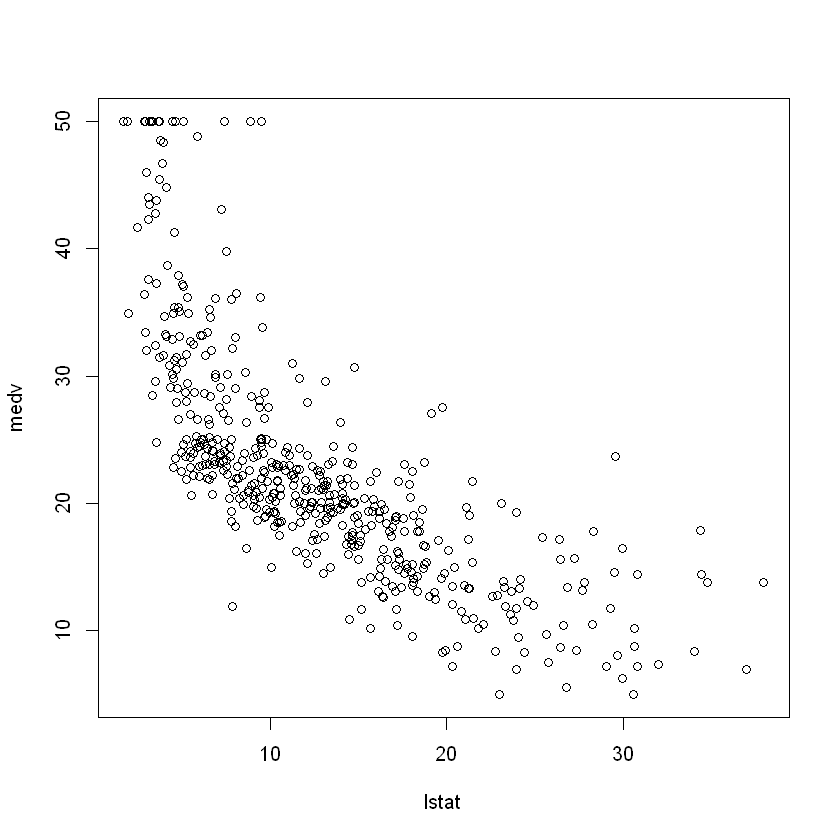

In [33]:
plot(lstat, medv)

It looks like the percent of lower status of the population seems to be strongly and inversely correlated with the median value of homes - which makes sense. The more lower status people there are, the less expensives the homes would be.

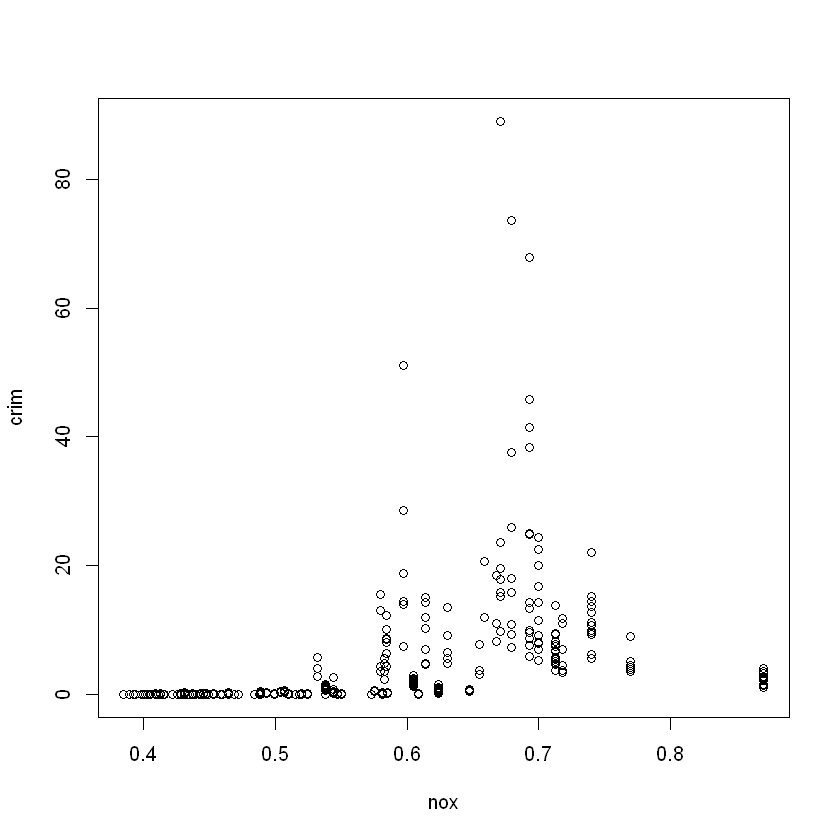

In [35]:
plot(nox, crim)

For some reason there are higher crime rates at a NO level of 0.6-0.7???

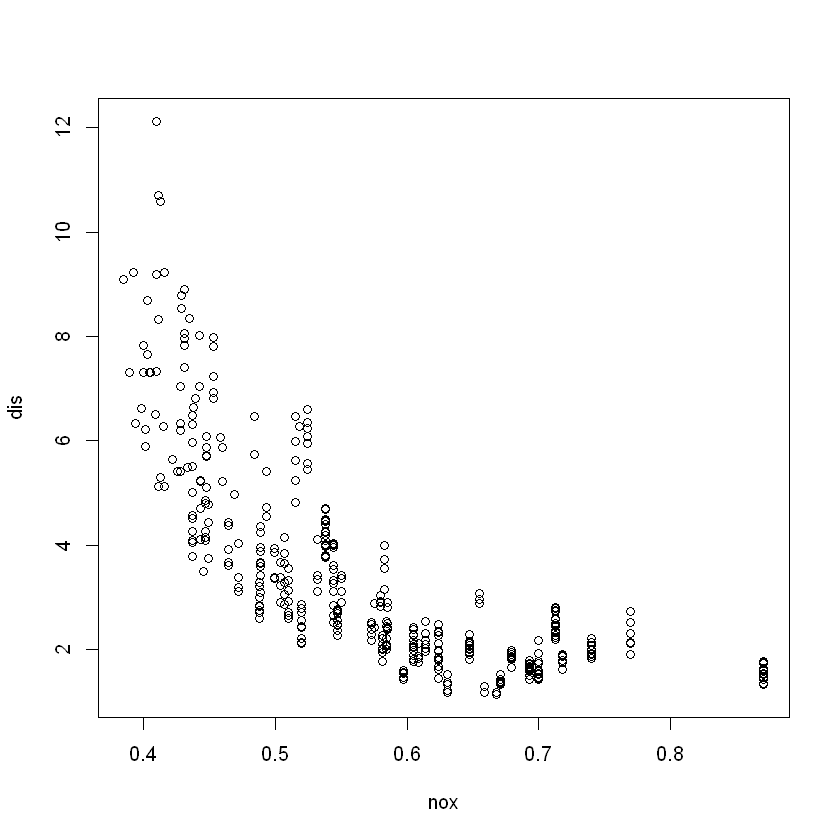

In [34]:
plot(nox, dis)

Also, for some reason there are NO levels seem to be correlated with distance to Boston employment centers (do the employment centers produce NO?)

### Part (c)
Are any of the predictors associated with per capita crime rate? If so, explain the relationship.

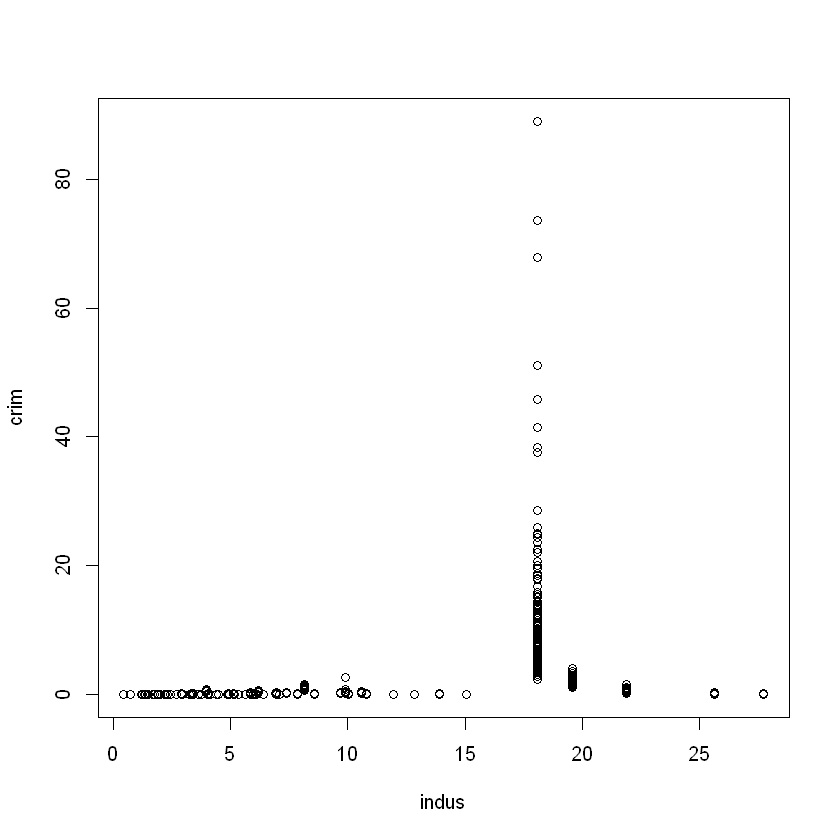

In [40]:
plot(indus, crim)

This is the only predictor that seems to have an association - but the association is just that if the proportion of non-retail business is 17 percent then the crime rate skyrockets? Doesn't seem to be very reliable data...

### Part (d)

Do any of the suburbs of Boston appear to have particularly high crime rates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.

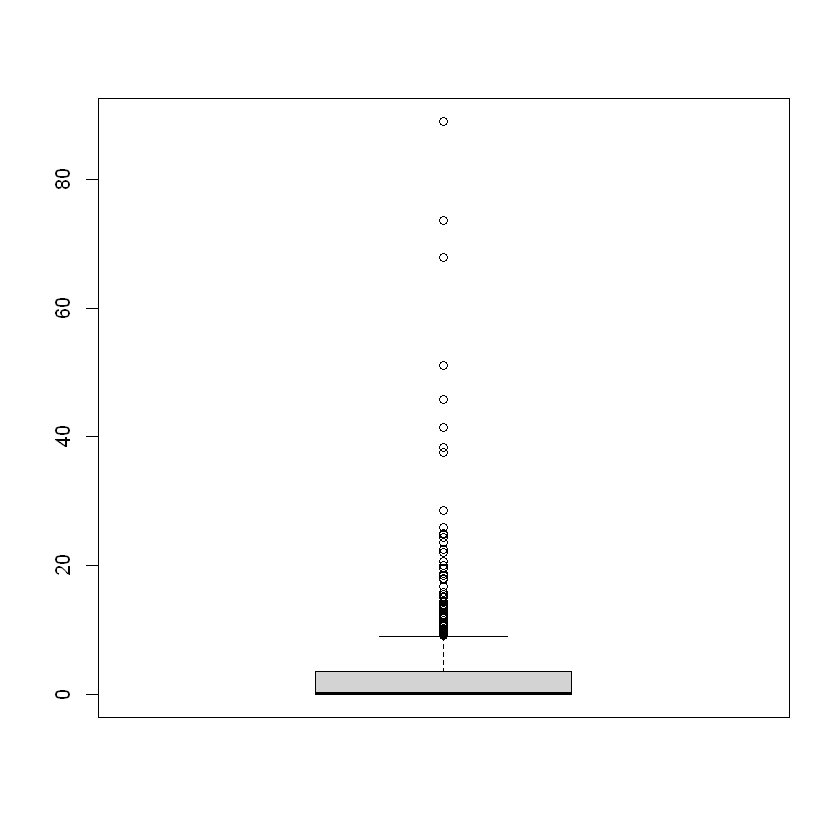

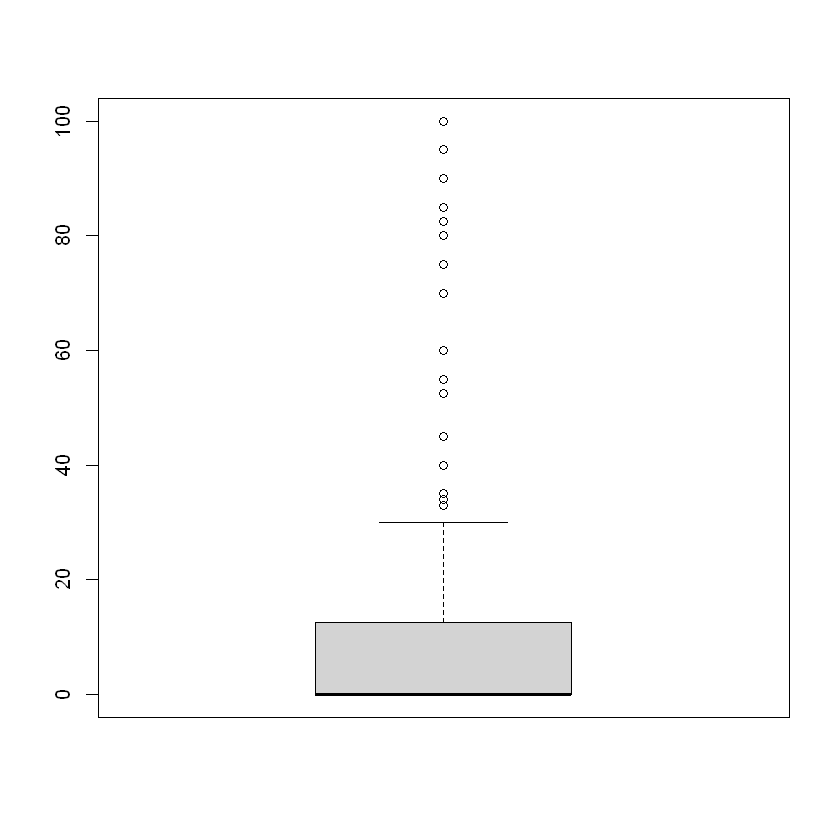

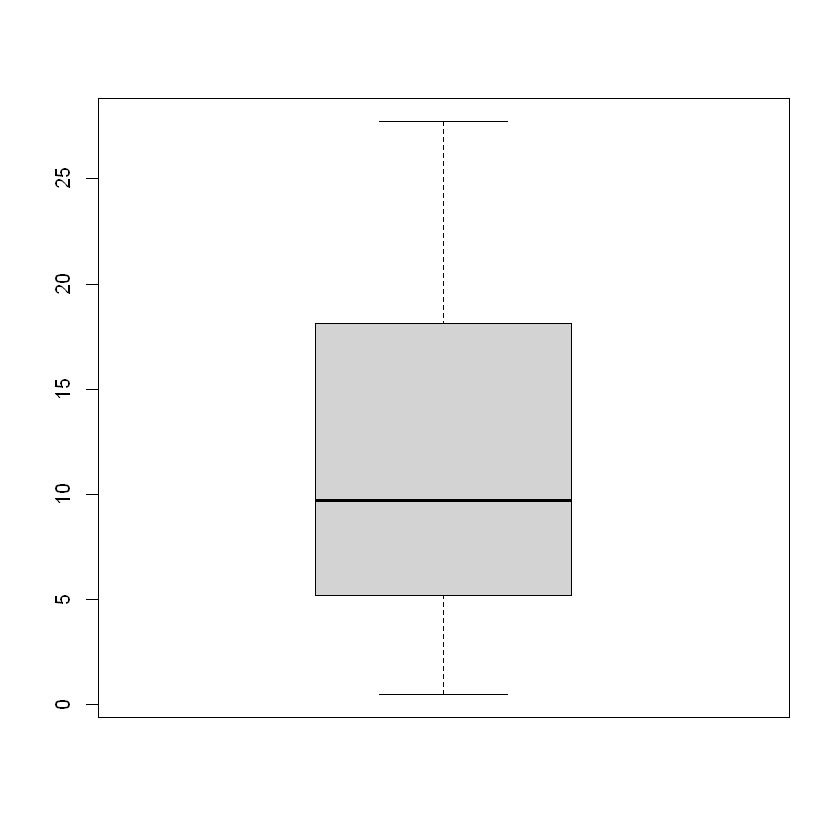

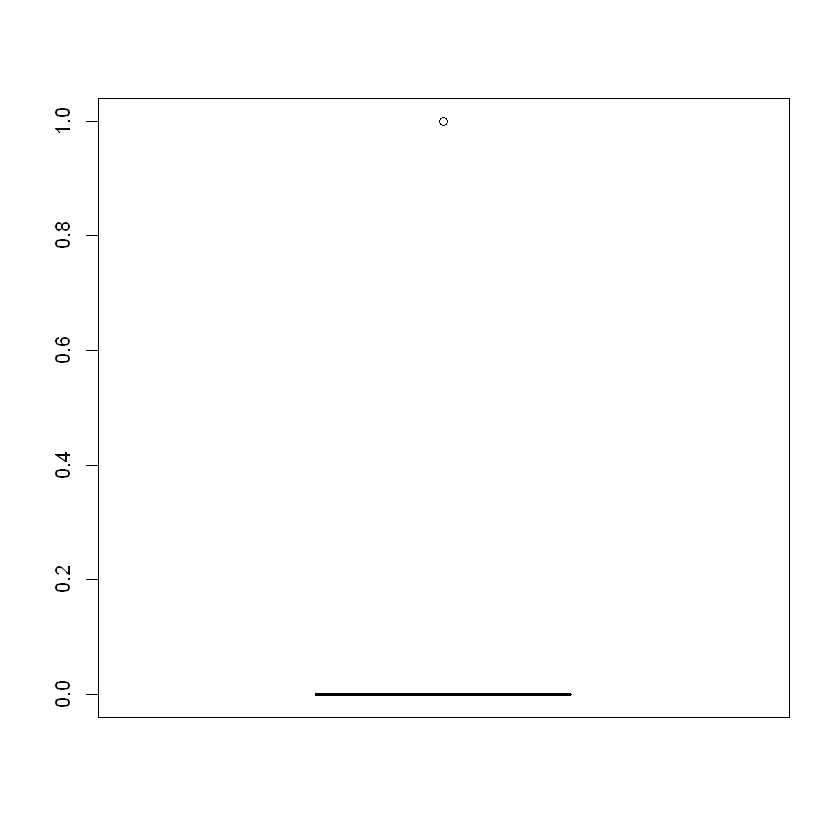

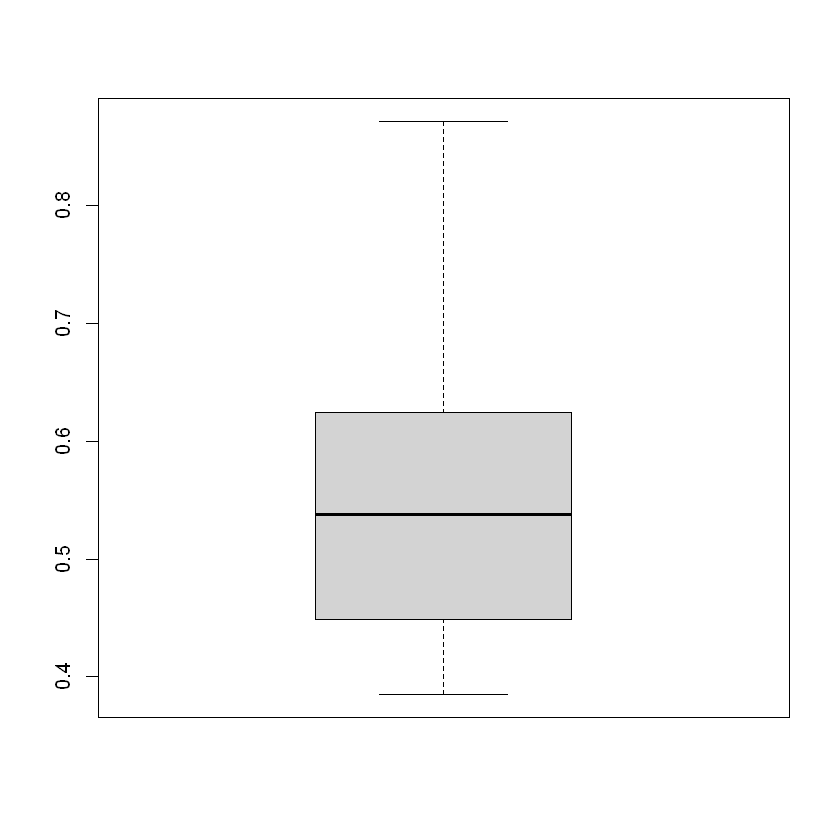

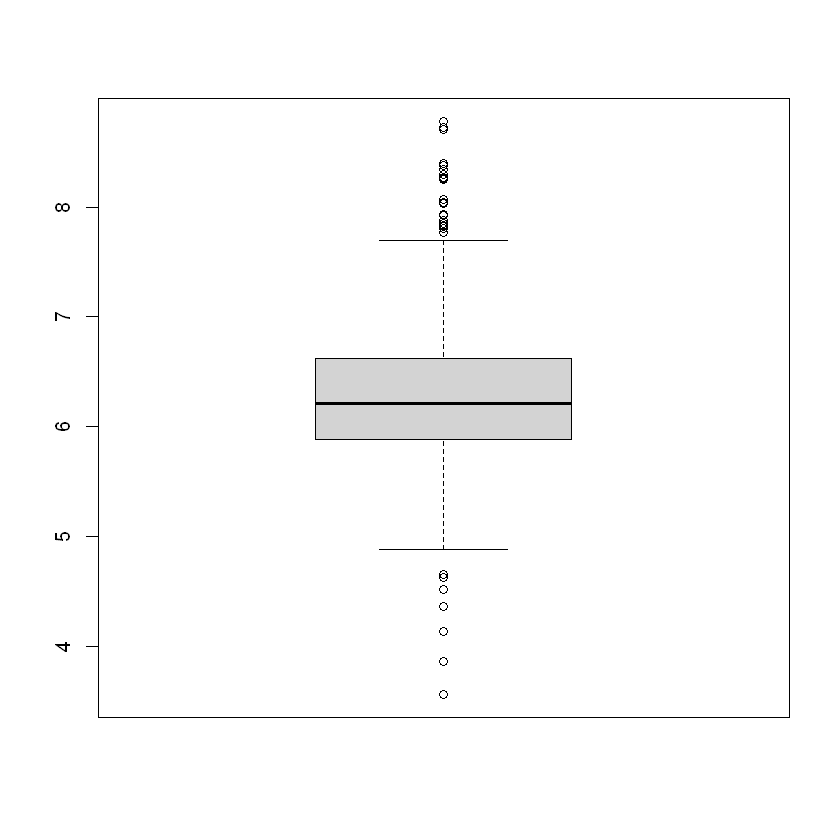

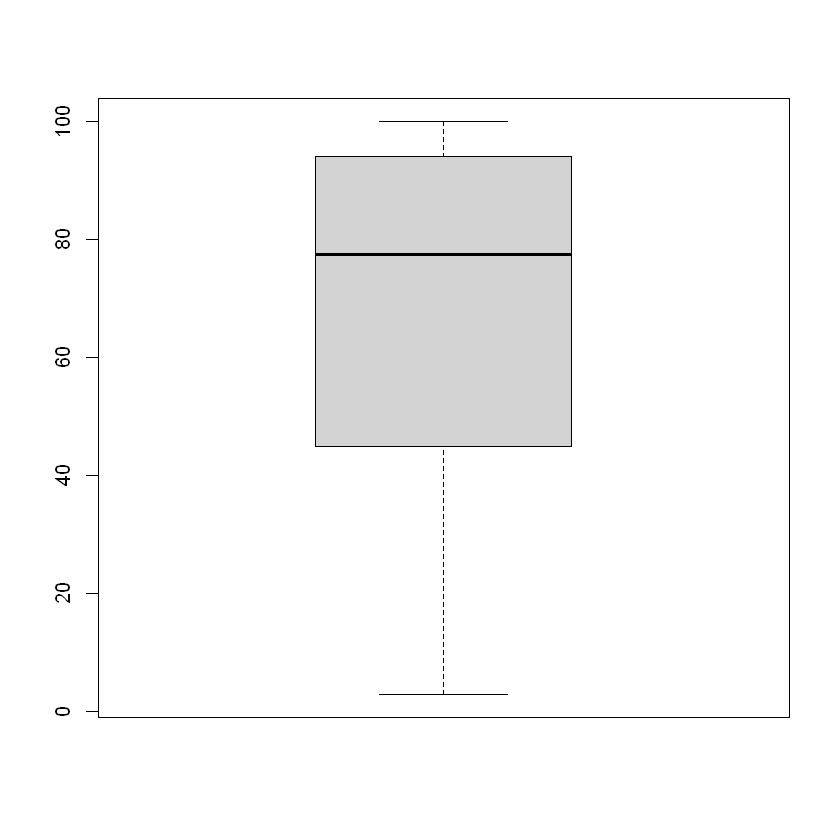

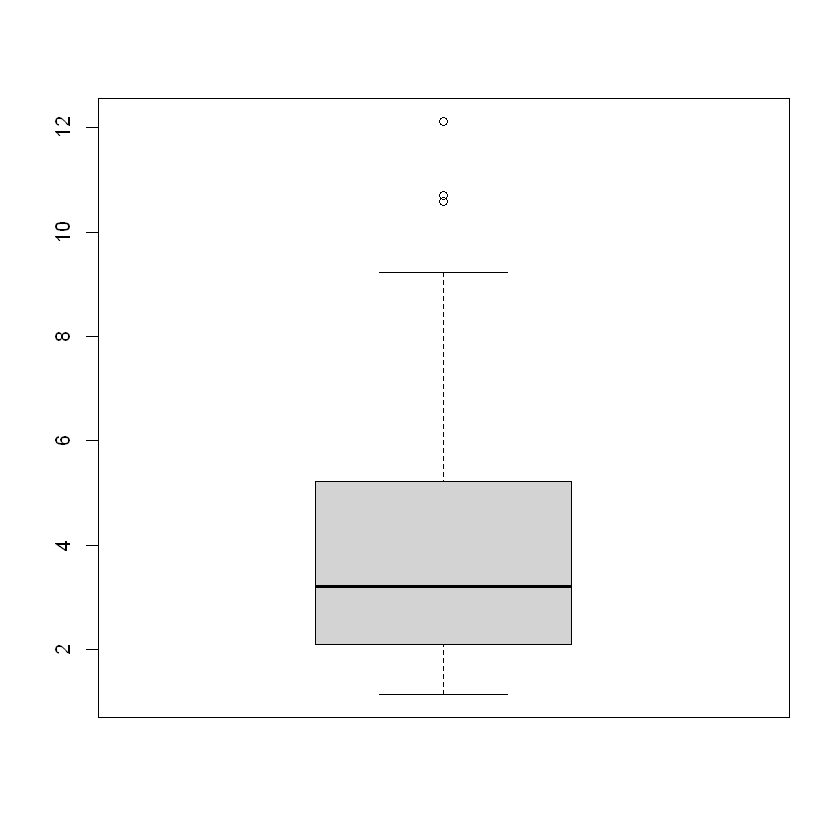

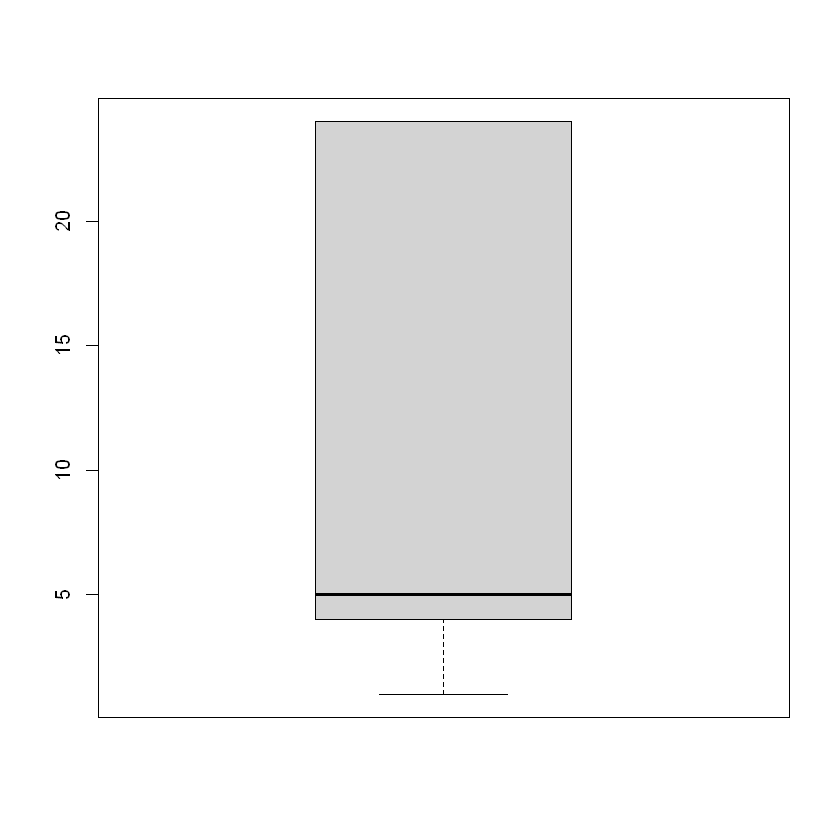

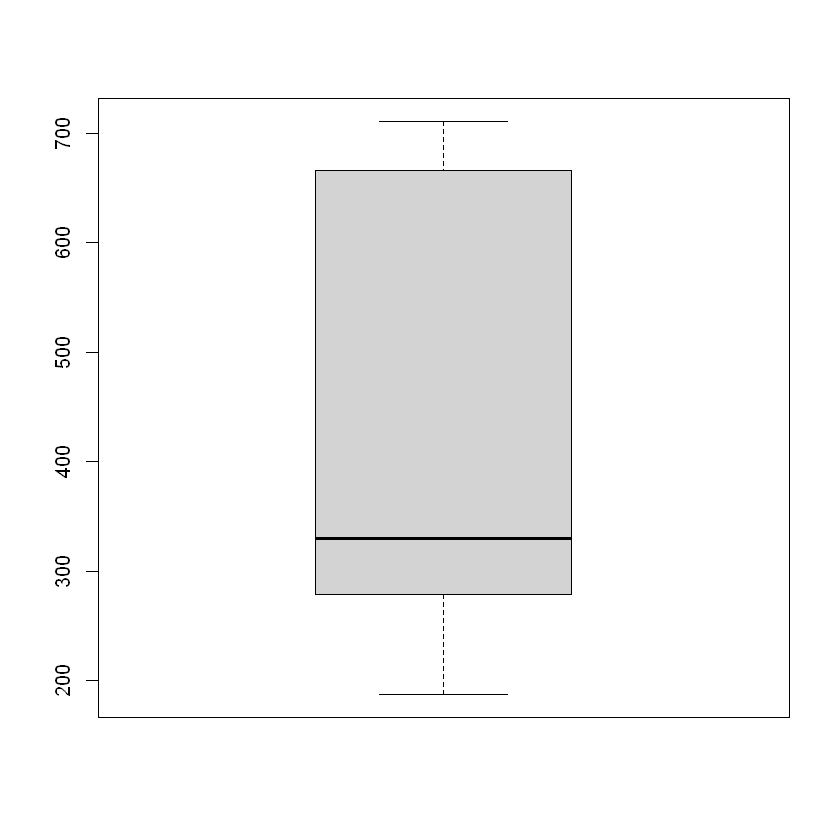

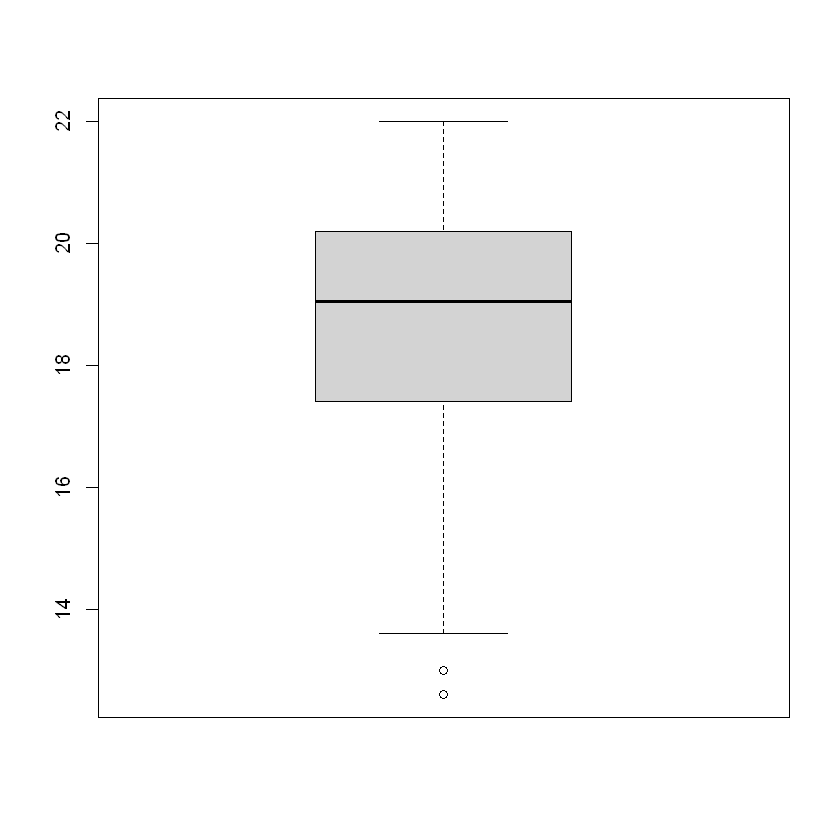

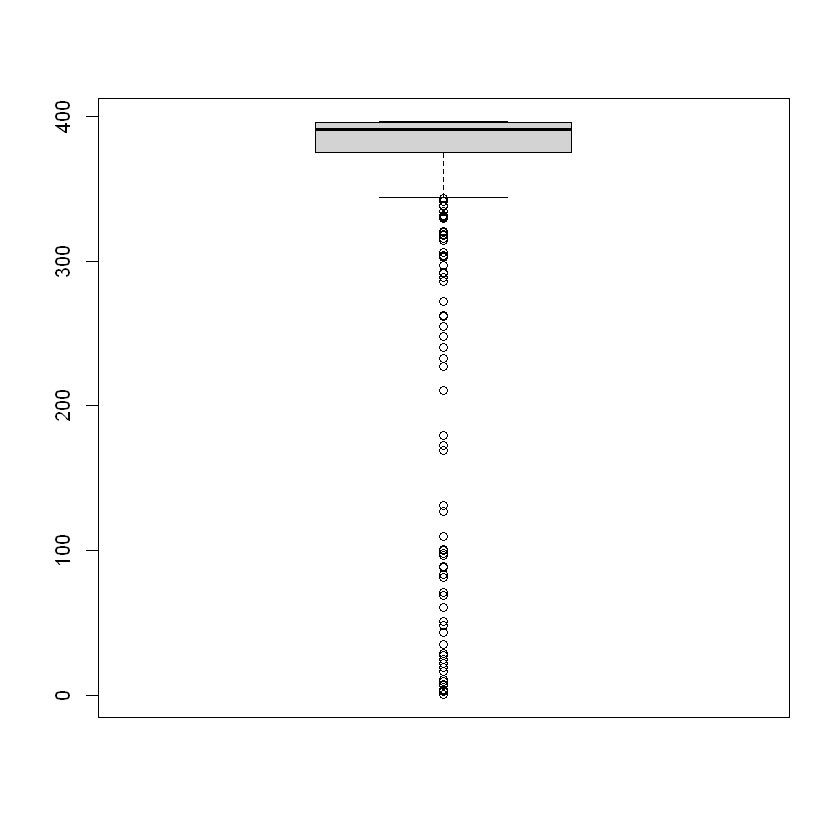

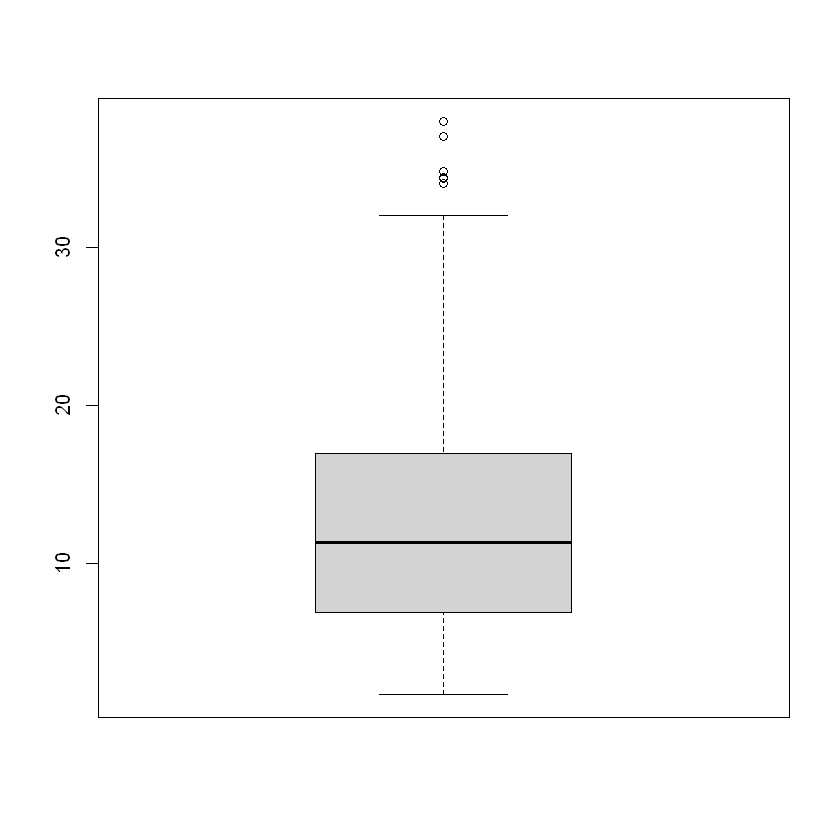

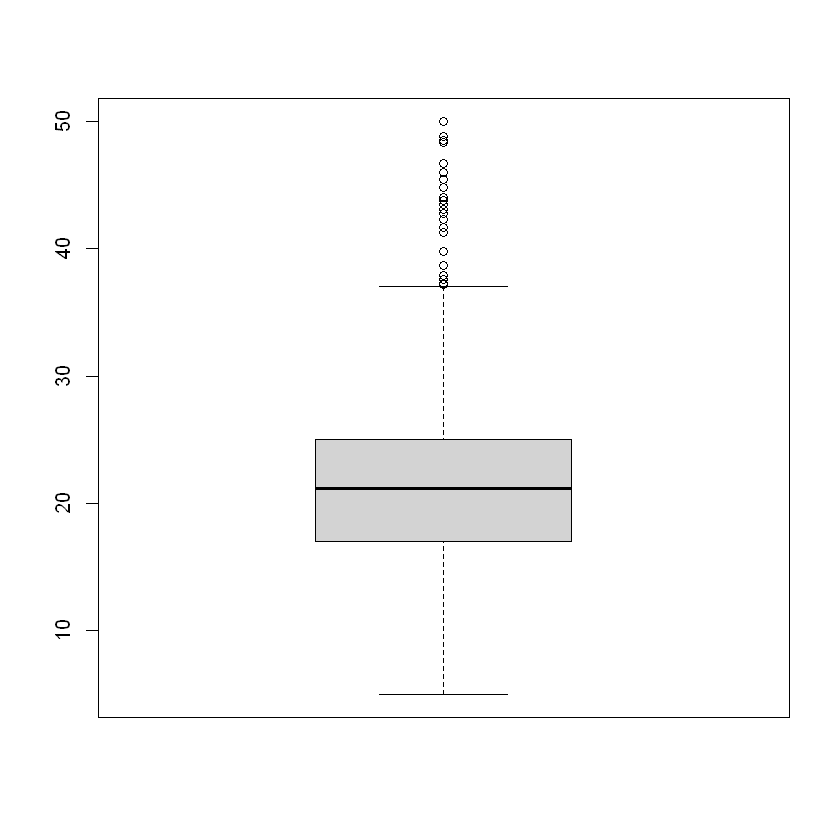

In [49]:
boxplots = lapply(Boston, boxplot)

Based on the box plots, we can see which predictors have outliers:

* crim: High outliers
* zn: High outliers
* inuds: No outliers
* chas: N/A (Qualitative Predictor)
* nox: No outliers
* rm: High and low outliers
* age" No outliers
* dis: High outliers
* rad: No outliers
* tax: No outliers
* ptratio: Low outliers
* black: Low outliers
* lstat: High outliers
* medv: High outliers


In [50]:
print("Ranges")
lapply(Boston, range)

[1] "Ranges"


$crim
[1]  0.00632 88.97620

$zn
[1]   0 100

$indus
[1]  0.46 27.74

$chas
[1] 0 1

$nox
[1] 0.385 0.871

$rm
[1] 3.561 8.780

$age
[1]   2.9 100.0

$dis
[1]  1.1296 12.1265

$rad
[1]  1 24

$tax
[1] 187 711

$ptratio
[1] 12.6 22.0

$black
[1]   0.32 396.90

$lstat
[1]  1.73 37.97

$medv
[1]  5 50

The ranges of each predictor varies a lot because each represent different properties and are measured in different units - so you can't really compare them.

### Part (e)
How many of the suburbs in this data set bound the Charles river?

In [52]:
summary(chas)

0   1 
471  35

1 means the suburb bounds the river so there are 35 suburbs.

### Part (f)
What is the median pupil-teacher ratio among the towns in this data set?

In [53]:
median(ptratio)

[1] 19.05

The median pupil-teacher ratio is 19.05%

### Part (g)

Which suburb of Boston has lowest median value of owneroccupied homes? What are the values of the other predictors for that suburb, and how do those values compare to the overall ranges for those predictors? Comment on your findings.

In [81]:
min_med = Boston[which.min(medv),]
print(min_med)

       crim zn indus chas   nox    rm age    dis rad tax ptratio black lstat
399 38.3518  0  18.1    0 0.693 5.453 100 1.4896  24 666    20.2 396.9 30.59
    medv
399    5


The subrub with the lowest median also has zn and dis at a minimum and agerad, and black at a maximum. The rm is also very low. This tells us that cheapest subrub is one that is far away from highways, contains a lot of old buildings, and contains no black people (396.9 indicates proportion of blacks is 0). Additionally there is no residential land zoned for over 25,000 ft.

### Part (h)
In this data set, how many of the suburbs average more than seven rooms per dwelling? More than eight rooms per dwelling? Comment on the suburbs that average more than eight rooms per dwelling.

In [70]:
print("# of suburbs with avg > 7 rooms per dwelling")
print(sum(rm > 7))
print("# of suburbs with avg > 8 rooms per dwelling")
print(sum(rm > 8))


summary(Boston[rm>8,])
summary(Boston)

[1] "# of suburbs with avg > 7 rooms per dwelling"
[1] 64
[1] "# of suburbs with avg > 8 rooms per dwelling"
[1] 13


      crim               zn            indus             chas       
 Min.   :0.02009   Min.   : 0.00   Min.   : 2.680   Min.   :0.0000  
 1st Qu.:0.33147   1st Qu.: 0.00   1st Qu.: 3.970   1st Qu.:0.0000  
 Median :0.52014   Median : 0.00   Median : 6.200   Median :0.0000  
 Mean   :0.71880   Mean   :13.62   Mean   : 7.078   Mean   :0.1538  
 3rd Qu.:0.57834   3rd Qu.:20.00   3rd Qu.: 6.200   3rd Qu.:0.0000  
 Max.   :3.47428   Max.   :95.00   Max.   :19.580   Max.   :1.0000  
      nox               rm             age             dis       
 Min.   :0.4161   Min.   :8.034   Min.   : 8.40   Min.   :1.801  
 1st Qu.:0.5040   1st Qu.:8.247   1st Qu.:70.40   1st Qu.:2.288  
 Median :0.5070   Median :8.297   Median :78.30   Median :2.894  
 Mean   :0.5392   Mean   :8.349   Mean   :71.54   Mean   :3.430  
 3rd Qu.:0.6050   3rd Qu.:8.398   3rd Qu.:86.50   3rd Qu.:3.652  
 Max.   :0.7180   Max.   :8.780   Max.   :93.90   Max.   :8.907  
      rad              tax           ptratio          b

      crim                zn             indus            chas        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      nox               rm             age              dis        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      rad              tax 

The max crime in the suburbs with avg. over 8 rooms have a max crime rate of 3.5 compared to an overall max of 89.0. The maximum proportion of black people in those suburbs is 3%. The maximum proportion of lower status people is 7.44% compared to an overall max of 37.97%.